# Comparaciones, masks y lógica booleana

Esta sección cubre el uso de masks  booleanas para examinar y manipular valores dentro de los arrays de NumPy.
El masking surge cuando se quiere extraer, modificar, contar o manipular de alguna manera los valores de un array basándose en algún criterio: por ejemplo, se puede querer contar todos los valores mayores que un determinado valor, o quizás eliminar todos los valores atípicos que estén por encima de algún umbral.
En NumPy, el masking  booleano es a menudo la forma más eficiente de realizar este tipo de tareas.

## Ejemplo: Contar los días de lluvia

Imagina que tienes una serie de datos que representan la cantidad de precipitaciones de cada día durante un año en una ciudad determinada.
Por ejemplo, aquí cargaremos las estadísticas de precipitaciones diarias para la ciudad de Seattle en 2014, utilizando Pandas (que se trata con más detalle en el [Capítulo 3](03.00-Introducción a Pandas.ipynb)):

In [ ]:
import numpy as np
import pandas as pd

# utilizar pandas para extraer las pulgadas de lluvia como un array NumPy
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

El array contiene 365 valores, que dan las precipitaciones diarias en pulgadas desde el 1 de enero hasta el 31 de diciembre de 2014.

Como primera visualización rápida, veamos el histograma de los días de lluvia, que se generó utilizando Matplotlib (exploraremos esta herramienta más a fondo en el [Capítulo 4](04.00-Introduction-To-Matplotlib.ipynb)):

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

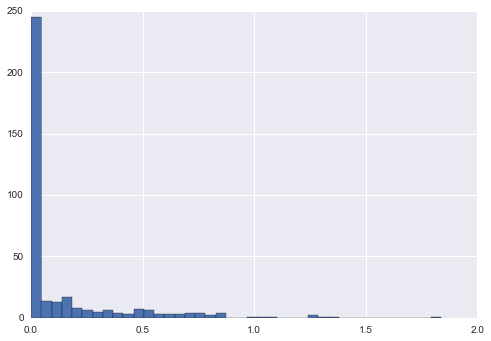

In [ ]:
plt.hist(inches, 40);

Este histograma nos da una idea general de cómo son los datos: a pesar de su reputación, la gran mayoría de los días en Seattle tuvieron una precipitación medida cercana a cero en 2014.
Pero esto no sirve para transmitir cierta información que nos gustaría ver: por ejemplo, ¿cuántos días de lluvia hubo en el año? ¿Cuál es la precipitación media en esos días de lluvia? ¿Cuántos días hubo con más de media pulgada de lluvia?

### Digging into the data

Un enfoque para esto sería responder a estas preguntas a mano: hacer un bucle a través de los datos, incrementando un contador cada vez que veamos valores en algún rango deseado.
Por las razones discutidas a lo largo de este capítulo, este enfoque es muy ineficiente, tanto desde el punto de vista del tiempo de escritura de código y el tiempo de cálculo del resultado.
Ya vimos en [Computación en arrays de NumPy: Funciones universales](02.03-Computacion-en-arrays-ufuncs.ipynb) que las ufuncs de NumPy pueden usarse en lugar de los bucles para hacer operaciones aritméticas rápidas a nivel de elemento sobre arrays; de la misma manera, podemos usar otras ufuncs para hacer *comparaciones* a nivel de elemento sobre arrays, y luego podemos manipular los resultados para responder a las preguntas que tenemos.
Dejaremos los datos a un lado por ahora, y discutiremos algunas herramientas generales en NumPy para usar el *masking* para responder rápidamente a este tipo de preguntas.

## Operadores de comparación como ufuncs

En [Computación en arrays de NumPy: Funciones universales](02.03-Computacion-en-arrays-ufuncs.ipynb) introdujimos las ufuncs, y nos centramos en particular en los operadores aritméticos. Vimos que el uso de ``+``, ``-``, ``*``, ``/``, y otros en arrays conduce a operaciones de tipo elemento-sabio.
NumPy también implementa operadores de comparación como ``<`` (menor que) y ``>`` (mayor que) como ufunciones de elemento a elemento.
El resultado de estos operadores de comparación es siempre un array de tipo booleano.
Las seis operaciones de comparación estándar están disponibles:

In [ ]:
x = np.array([1, 2, 3, 4, 5])

In [ ]:
x < 3  # menos que

array([ True,  True, False, False, False], dtype=bool)

In [ ]:
x > 3  # mayor que

array([False, False, False,  True,  True], dtype=bool)

In [ ]:
x <= 3  # menor o igual que

array([ True,  True,  True, False, False], dtype=bool)

In [ ]:
x >= 3  # mayor o igual que

array([False, False,  True,  True,  True], dtype=bool)

In [ ]:
x != 3  # no igual

array([ True,  True, False,  True,  True], dtype=bool)

In [ ]:
x == 3  # igual

array([False, False,  True, False, False], dtype=bool)

También es posible hacer una comparación por elementos de dos arrays, e incluir expresiones compuestas:

In [ ]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False], dtype=bool)

Como en el caso de los operadores aritméticos, los operadores de comparación se implementan como ufuncs en NumPy; por ejemplo, cuando se escribe ``x < 3``, internamente NumPy utiliza ``np.less(x, 3)``.
    Aquí se muestra un resumen de los operadores de comparación y su ufunc equivalente:
| Operador 	    |  Ufunc equivalente  || Operador 	   |  Ufunc equivalente  |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

Al igual que en el caso de las ufunciones aritméticas, éstas funcionarán en arrays de cualquier tamaño y forma.
He aquí un ejemplo bidimensional:

In [ ]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [ ]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

En cada caso, el resultado es un array booleana, y NumPy proporciona una serie de patrones sencillos para trabajar con estos resultados booleanos.

## Trabajar con arrays booleanas

Dada un array booleana, hay un montón de operaciones útiles que puedes hacer.
Trabajaremos con ``x``, el array bidimensional que creamos antes.

In [ ]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Contar entradas

Para contar el número de entradas ``True`` en un array booleana, ``np.count_nonzero`` es útil:

In [ ]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

Vemos que hay ocho entradas del array que son menores que 6.
Otra forma de obtener esta información es utilizar ``np.sum``; en este caso, ``False`` se interpreta como ``0``, y ``True`` se interpreta como ``1``:

In [ ]:
np.sum(x < 6)

8

La ventaja de ``sum()`` es que, al igual que con otras funciones de agregación de NumPy, esta suma puede realizarse también a lo largo de filas o columnas:

In [ ]:
# ¿cuántos valores inferiores a 6 hay en cada fila?
np.sum(x < 6, axis=1)

array([4, 2, 2])

Esto cuenta el número de valores menores que 6 en cada fila del array.

Si nos interesa comprobar rápidamente si alguno o todos los valores son verdaderos, podemos utilizar (lo has adivinado) ``np.any`` o ``np.all``:

In [ ]:
# ¿hay valores superiores a 8?
np.any(x > 8)

True

In [ ]:
# ¿hay algún valor inferior a cero?
np.any(x < 0)

False

In [ ]:
# ¿todos los valores son inferiores a 10?
np.all(x < 10)

True

In [ ]:
# ¿son todos los valores iguales a 6?
np.all(x == 6)

False

``np.all`` y ``np.any`` pueden utilizarse también a lo largo de determinados ejes. Por ejemplo:

In [ ]:
# ¿todos los valores de cada fila son menores que 8?
np.all(x < 8, axis=1)

array([ True, False,  True], dtype=bool)

En este caso, todos los elementos de la primera y tercera filas son menores de 8, mientras que no es el caso de la segunda fila.

Por último, una advertencia rápida: como se menciona en [Agregaciones: Mínimo, máximo y todo lo que hay entre medias](02.04-02.04-Cómputo-en-arrays-agregados.ipynb), Python tiene incorporadas las funciones ``sum()``, ``any()``, y ``all()``. Éstas tienen una sintaxis diferente a la de las versiones de NumPy, y en particular fallarán o producirán resultados no deseados cuando se utilicen en arrays multidimensionales. ¡Asegúrese de que está utilizando ``np.sum()``, ``np.any()``, y ``np.all()`` por estos ejemplos!

### Operadores booleanos

Ya hemos visto cómo podríamos contar, por ejemplo, todos los días con lluvia inferior a cuatro pulgadas, o todos los días con lluvia superior a dos pulgadas.
¿Pero qué pasa si queremos saber todos los días con lluvia menor de cuatro pulgadas y mayor de una?
Esto se consigue con los *operadores lógicos de bits* de Python, ``&``, ``|``, ``^`` y ``~``.
Al igual que con los operadores aritméticos estándar, NumPy los sobrecarga como ufunciones que trabajan elemento a elemento en arrays (normalmente booleanas).

Por ejemplo, podemos abordar este tipo de preguntas compuestas de la siguiente manera:

In [ ]:
np.sum((inches > 0.5) & (inches < 1))

29

Así, vemos que hay 29 días con precipitaciones entre 0,5 y 1,0 pulgadas.

Tenga en cuenta que los paréntesis aquí son importantes, ya que, debido a las reglas de precedencia de los operadores, si se eliminan los paréntesis esta expresión se evaluaría de la siguiente manera, lo que da lugar a un error:

``` python
inches > (0.5 & inches) < 1
```

Utilizando la equivalencia de *A AND B* y *NOT (NOT A OR NOT B)* (que quizá recuerdes si has hecho un curso de introducción a la lógica), podemos calcular el mismo resultado de una manera diferente:

In [ ]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

La combinación de operadores de comparación y operadores booleanos en arrays puede dar lugar a una amplia gama de operaciones lógicas eficientes.

La siguiente tabla resume los operadores booleanos por bits y sus ufunciones equivalentes:

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

Utilizando estas herramientas, podríamos empezar a responder a los tipos de preguntas que tenemos sobre nuestros datos meteorológicos.
He aquí algunos ejemplos de resultados que podemos calcular al combinar el enmascaramiento con las agregaciones:

In [ ]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Arrays booleanas como Masks

En la sección anterior vimos los agregados calculados directamente en arrays booleanas.
Un patrón más poderoso es utilizar arrays booleanas como masks, para seleccionar subconjuntos particulares de los datos mismos.
Volviendo a nuestro array ``x`` de antes, supongamos que queremos un array de todos los valores del array que sean menores que, digamos, 5:

In [ ]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

Podemos obtener un array booleana para esta condición fácilmente, como ya hemos visto:

In [ ]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]], dtype=bool)

Ahora, para *seleccionar* estos valores del array, podemos simplemente indexar en este array booleana; esto se conoce como una operación *masking*:

In [ ]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

Lo que se devuelve es un array unidimensional lleno de todos los valores que cumplen esta condición; en otras palabras, todos los valores en posiciones en las que el array mask es ``True``.

A continuación, somos libres de operar con estos valores como queramos.
Por ejemplo, podemos calcular algunas estadísticas relevantes sobre nuestros datos de lluvia de Seattle:

In [ ]:
# construir un mask de todos los días de lluvia
rainy = (inches > 0)

# construir un mask de todos los días de verano (el 21 de junio es el día nº 172)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Mediana de las precipitaciones en días de lluvia en 2014 (pulgadas):   ",
      np.median(inches[rainy]))
print("Mediana de las precipitaciones en los días de verano de 2014 (pulgadas):  ",
      np.median(inches[summer]))
print("Precipitación máxima en los días de verano de 2014 (pulgadas): ",
      np.max(inches[summer]))
print("Mediana de las precipitaciones en días de lluvia no estivales (pulgadas):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.194881889764
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.850393700787
Median precip on non-summer rainy days (inches): 0.200787401575


Combinando operaciones booleanas, operaciones de masking y agregados, podemos responder muy rápidamente a este tipo de preguntas para nuestro conjunto de datos.

## Aside: Uso de las palabras clave y/o frente a los operadores &/|

Un punto común de confusión es la diferencia entre las palabras clave ``and`` y ``or`` por un lado, y los operadores ``&`` y ``|`` por otro.
¿Cuándo hay que utilizar uno y otro?

La diferencia es la siguiente: ``and`` y ``or`` miden la verdad o la falsedad de *todo el objeto*, mientras que ``&`` y ``|`` se refieren a *bits dentro de cada objeto*.

Cuando usas ``and`` o ``or``, equivale a pedir a Python que trate el objeto como una única entidad booleana.
En Python, todos los integers no nulos se evaluarán como True. Por lo tanto:

In [ ]:
bool(42), bool(0)

(True, False)

In [ ]:
bool(42 and 0)

False

In [ ]:
bool(42 or 0)

True

Cuando se utiliza ``&`` y ``|`` en números enteros, la expresión opera sobre los bits del elemento, aplicando el *and* o el *or* a los bits individuales que componen el número:

In [ ]:
bin(42)

'0b101010'

In [ ]:
bin(59)

'0b111011'

In [ ]:
bin(42 & 59)

'0b101010'

In [ ]:
bin(42 | 59)

'0b111011'

Observe que los bits correspondientes de la representación binaria se comparan para obtener el resultado.

Cuando se tiene un array de valores booleanos en NumPy, se puede pensar en ella como una cadena de bits donde ``1 = True`` y ``0 = False``, y el resultado de ``&`` y ``|`` opera de forma similar a la anterior:

In [ ]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True], dtype=bool)

El uso de ``o`` en estos arrays tratará de evaluar la verdad o la falsedad de todo el objeto del array, que no es un valor bien definido:

In [ ]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Del mismo modo, al realizar una expresión booleana en un array dado, debes utilizar ``|`` o ``&`` en lugar de ``or`` o ``and``:

In [ ]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False, False], dtype=bool)

Intentar evaluar la verdad o la falsedad de todo el array dará el mismo ``ValueError`` que vimos anteriormente:

In [ ]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Así que recuerde esto: ``and`` y ``or`` realizan una única evaluación booleana sobre un objeto completo, mientras que ``&`` y ``|`` realizan múltiples evaluaciones booleanas sobre el contenido (los bits o bytes individuales) de un objeto.
Para las arrays booleanas de NumPy, esta última es casi siempre la operación deseada.